In [14]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Preprocessing

## 1.1 Load Data

In [2]:
df = pd.read_csv("sales_data_challenge.csv")

df

,order_id,date,product_id,category,price,quantity,customer_region
0,1,2025-01-20,P043,Electronics,5.14,5,East
1,2,2024-11-15,P048,Books,54.07,1,East
2,3,2024-12-08,P030,Home,256.96,5,North
3,4,2024-12-22,P031,Books,205.12,1,West
4,5,2024-11-18,P049,Clothing,150.13,5,West
...,...,...,...,...,...,...,...
995,996,2025-05-13,P037,Toys,211.89,2,East
996,997,2025-03-10,P033,Clothing,299.05,2,South
997,998,2025-04-05,P026,Home,93.51,1,East
998,999,2025-02-21,P041,Toys,15.56,5,North


## 1.2 Missing Values

In [3]:
print("Missing values for df:")
print(df.isnull().sum())

Missing values for df:
order_id           0
date               0
product_id         0
category           0
price              0
quantity           0
customer_region    0
dtype: int64


## 1.3 Label Encoder

Encode `customer_region` feature using OneHotEncoder.

In [4]:
enc_region = OneHotEncoder()

encoded = enc_region.fit_transform(df[['customer_region']])

encoded_df = pd.DataFrame(encoded.toarray(), columns=enc_region.get_feature_names_out(['customer_region']))

encoded_df

df = pd.concat([df, encoded_df], axis=1)

df = df.drop(columns=["customer_region"])

df

,order_id,date,product_id,category,price,quantity,customer_region_East,customer_region_North,customer_region_South,customer_region_West
0,1,2025-01-20,P043,Electronics,5.14,5,1.0,0.0,0.0,0.0
1,2,2024-11-15,P048,Books,54.07,1,1.0,0.0,0.0,0.0
2,3,2024-12-08,P030,Home,256.96,5,0.0,1.0,0.0,0.0
3,4,2024-12-22,P031,Books,205.12,1,0.0,0.0,0.0,1.0
4,5,2024-11-18,P049,Clothing,150.13,5,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
995,996,2025-05-13,P037,Toys,211.89,2,1.0,0.0,0.0,0.0
996,997,2025-03-10,P033,Clothing,299.05,2,0.0,0.0,1.0,0.0
997,998,2025-04-05,P026,Home,93.51,1,1.0,0.0,0.0,0.0
998,999,2025-02-21,P041,Toys,15.56,5,0.0,1.0,0.0,0.0


In [5]:
enc_category = OneHotEncoder()

encoded = enc_category.fit_transform(df[['category']])

encoded_df = pd.DataFrame(encoded.toarray(), columns=enc_category.get_feature_names_out(['category']))

df = pd.concat([df, encoded_df], axis=1)

df = df.drop(columns=["category"])

df

,order_id,date,product_id,price,quantity,customer_region_East,customer_region_North,customer_region_South,customer_region_West,category_Books,category_Clothing,category_Electronics,category_Home,category_Toys
0,1,2025-01-20,P043,5.14,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,2024-11-15,P048,54.07,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,2024-12-08,P030,256.96,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,2024-12-22,P031,205.12,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,5,2024-11-18,P049,150.13,5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2025-05-13,P037,211.89,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
996,997,2025-03-10,P033,299.05,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
997,998,2025-04-05,P026,93.51,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
998,999,2025-02-21,P041,15.56,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 1.4 Remove unused features

In [6]:
df = df.drop(columns=['order_id'])

## 1.5 Create sales feature

In [9]:
df['sales'] = df['price'] * df['quantity']

# 2. Trends

## 2.1 Sales over time feature

In [10]:
# convert date to datetime
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month


<Axes: title={'center': 'Daily Sales over time'}, xlabel='date'>

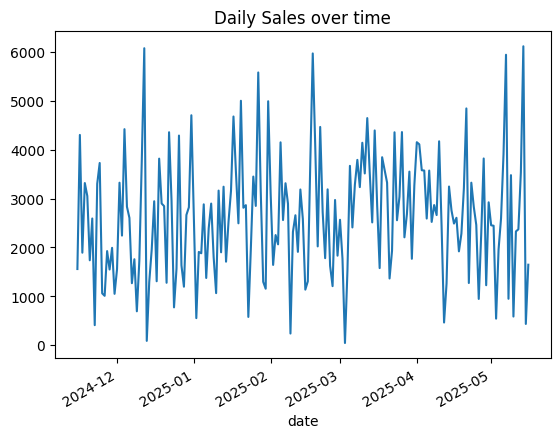

In [11]:
# create sales over time
sales_over_time = df.groupby('date')['sales'].sum()
sales_over_time.plot(title="Daily Sales over time")

<Axes: title={'center': 'Monthly Sales'}, xlabel='year,month'>

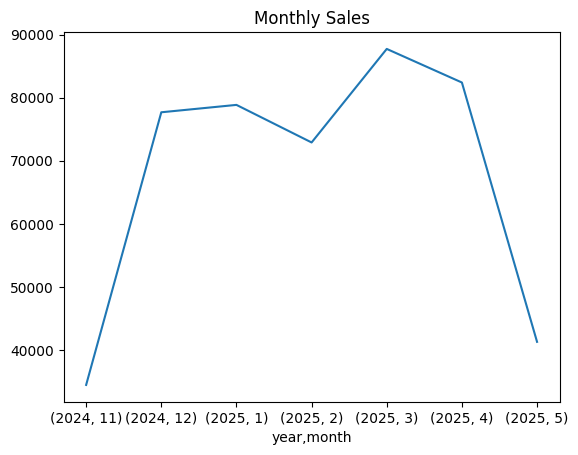

In [12]:
monthly_sales = df.groupby(['year', 'month'])['sales'].sum()
monthly_sales.plot(title="Monthly Sales")

## 2.2 Sales per Region

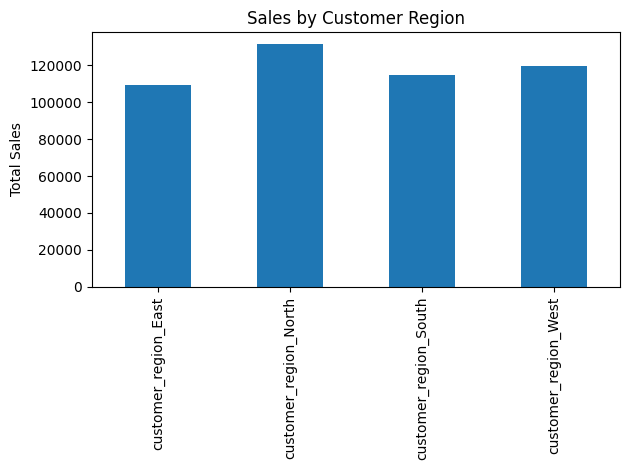

In [15]:
region_cols = [col for col in df.columns if col.startswith("customer_region_")]
region_sales = df[region_cols + ["sales"]].copy()
for col in region_cols:
    region_sales[col] = region_sales[col] * df["sales"]

region_totals = region_sales[region_cols].sum()
region_totals.plot(kind="bar", title="Sales by Customer Region")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

## 2.3 Sales by Category

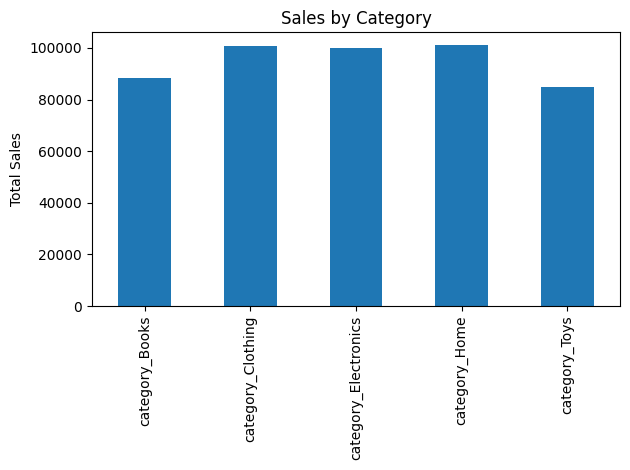

In [16]:
category_cols = [col for col in df.columns if col.startswith("category_")]
category_sales = df[category_cols + ["sales"]].copy()
for col in category_cols:
    category_sales[col] = category_sales[col] * df["sales"]

category_totals = category_sales[category_cols].sum()
category_totals.plot(kind="bar", title="Sales by Category")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

## 2.Region vs Category

/var/folders/mr/rqvpsf3j6tl3lgjfgt83f53h0000gn/T/ipykernel_91464/1620567629.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region_category_sales = df[df[region] == 1.0][df[category] == 1.0]["sales"].sum()
/var/folders/mr/rqvpsf3j6tl3lgjfgt83f53h0000gn/T/ipykernel_91464/1620567629.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region_category_sales = df[df[region] == 1.0][df[category] == 1.0]["sales"].sum()
/var/folders/mr/rqvpsf3j6tl3lgjfgt83f53h0000gn/T/ipykernel_91464/1620567629.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region_category_sales = df[df[region] == 1.0][df[category] == 1.0]["sales"].sum()
/var/folders/mr/rqvpsf3j6tl3lgjfgt83f53h0000gn/T/ipykernel_91464/1620567629.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region_category_sales = df[df[region] == 1.0][df[category] == 1.0]["sales"].sum()
/var/folders/mr/rqvpsf3j6tl3lgjf

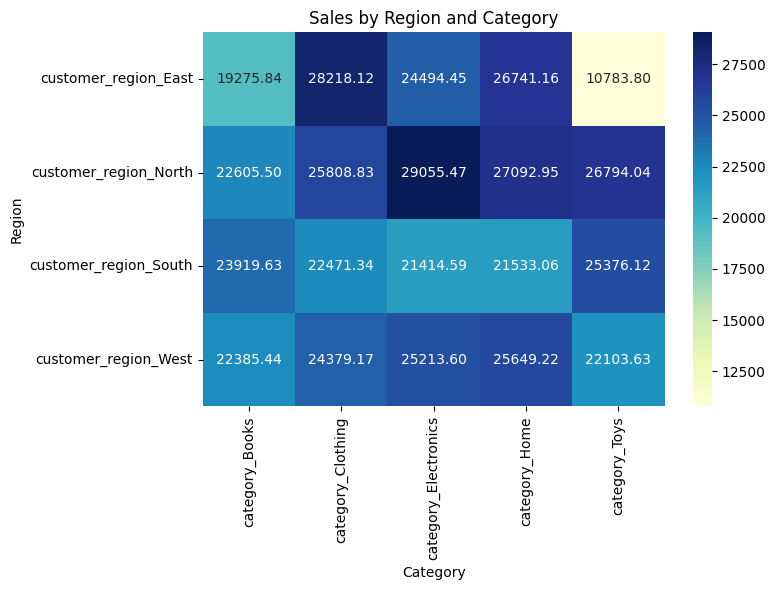

In [17]:
heatmap_data = pd.DataFrame(index=region_cols, columns=category_cols)

for region in region_cols:
    for category in category_cols:
        region_category_sales = df[df[region] == 1.0][df[category] == 1.0]["sales"].sum()
        heatmap_data.loc[region, category] = region_category_sales

heatmap_data = heatmap_data.fillna(0).astype(float)
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Sales by Region and Category")
plt.xlabel("Category")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

# 3. Conclusion

## Key Sales Patterns Identified

Top-Performing Region:
- The North region consistently generates the highest sales across the dataset, indicating strong customer activity or market presence in that area.

Best-Selling Categories:
- The most profitable product categories are Clothing, Electronics, and Home, suggesting these segments drive the majority of revenue

Seasonal Sales Peaks:
- The highest sales volumes occur during the holiday season (November to January), highlighting the impact of festive and end-of-year spending behavior.

---

Focus more ads for Electronics in North region, and Clothing in East region.